# 00. Table of Content
### 01. Import Libraries & Datasets
### 02. Preprocess Data
### 03. The Elbow Technique
### 04. K-means Clustering
### 05. Testing Principal Component Analysis

# 01. Import Libraries & Datasets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%config InlineBackend.figure_format='retina'

In [2]:
# Charts are displayed in notebook without the need to "call" them specifically.
%matplotlib inline

In [3]:
# Create path
path = r'C:\Users\krist\21.02.2024 World Happiness Report Analysis'

In [4]:
# Import D1
d1_full = pd.read_csv(os.path.join(path, '02 Data', 'Sourced Data', 'd1_full_score_data (2005-2022).csv'), index_col = False)

In [5]:
d1_full.head()

,country name,year,life Ladder,log GDP per capita,social support,healthy life expectancy at birth,freedom to make life choices,generosity,perceptions of corruption,positive affect,negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.168,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.191,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.121,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.164,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.238,0.776,0.614,0.268


In [6]:
d1_full.dtypes

country name                         object
year                                  int64
life Ladder                         float64
log GDP per capita                  float64
social support                      float64
healthy life expectancy at birth    float64
freedom to make life choices        float64
generosity                          float64
perceptions of corruption           float64
positive affect                     float64
negative affect                     float64
dtype: object

In [7]:
d1_full.shape

(2199, 11)

# 02. Preprocess Data

In [8]:
# Remove categorical variables from d1
d1_clus = d1_full.drop(columns=['country name', 'year'])

In [11]:
d1_clus

,life Ladder,log GDP per capita,social support,healthy life expectancy at birth,freedom to make life choices,generosity,perceptions of corruption,positive affect,negative affect
0,3.724,7.350,0.451,50.500,0.718,0.168,0.882,0.414,0.258
1,4.402,7.509,0.552,50.800,0.679,0.191,0.850,0.481,0.237
2,4.758,7.614,0.539,51.100,0.600,0.121,0.707,0.517,0.275
3,3.832,7.581,0.521,51.400,0.496,0.164,0.731,0.480,0.267
4,3.783,7.661,0.521,51.700,0.531,0.238,0.776,0.614,0.268
...,...,...,...,...,...,...,...,...,...
2194,3.616,7.783,0.775,52.625,0.763,-0.051,0.844,0.658,0.212
2195,2.694,7.698,0.759,53.100,0.632,-0.047,0.831,0.658,0.235
2196,3.160,7.596,0.717,53.575,0.643,0.006,0.789,0.661,0.346
2197,3.155,7.657,0.685,54.050,0.668,-0.076,0.757,0.610,0.242


In [14]:
d1_clus = d1_clus.dropna()

In [16]:
d1_clus

,life Ladder,log GDP per capita,social support,healthy life expectancy at birth,freedom to make life choices,generosity,perceptions of corruption,positive affect,negative affect
0,3.724,7.350,0.451,50.500,0.718,0.168,0.882,0.414,0.258
1,4.402,7.509,0.552,50.800,0.679,0.191,0.850,0.481,0.237
2,4.758,7.614,0.539,51.100,0.600,0.121,0.707,0.517,0.275
3,3.832,7.581,0.521,51.400,0.496,0.164,0.731,0.480,0.267
4,3.783,7.661,0.521,51.700,0.531,0.238,0.776,0.614,0.268
...,...,...,...,...,...,...,...,...,...
2194,3.616,7.783,0.775,52.625,0.763,-0.051,0.844,0.658,0.212
2195,2.694,7.698,0.759,53.100,0.632,-0.047,0.831,0.658,0.235
2196,3.160,7.596,0.717,53.575,0.643,0.006,0.789,0.661,0.346
2197,3.155,7.657,0.685,54.050,0.668,-0.076,0.757,0.610,0.242


# 02. The Elbow Technique

Find optmial count of clusters

In [17]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [18]:
score = [kmeans[i].fit(d1_clus).score(d1_clus) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\krist\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\krist\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\krist\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\krist\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

[-103180.07648002401,
 -32490.56305919457,
 -19369.4237462864,
 -13217.785936383518,
 -9644.718988932076,
 -7039.8540350127,
 -5743.351007548673,
 -4767.155550950522,
 -4174.958529216596]

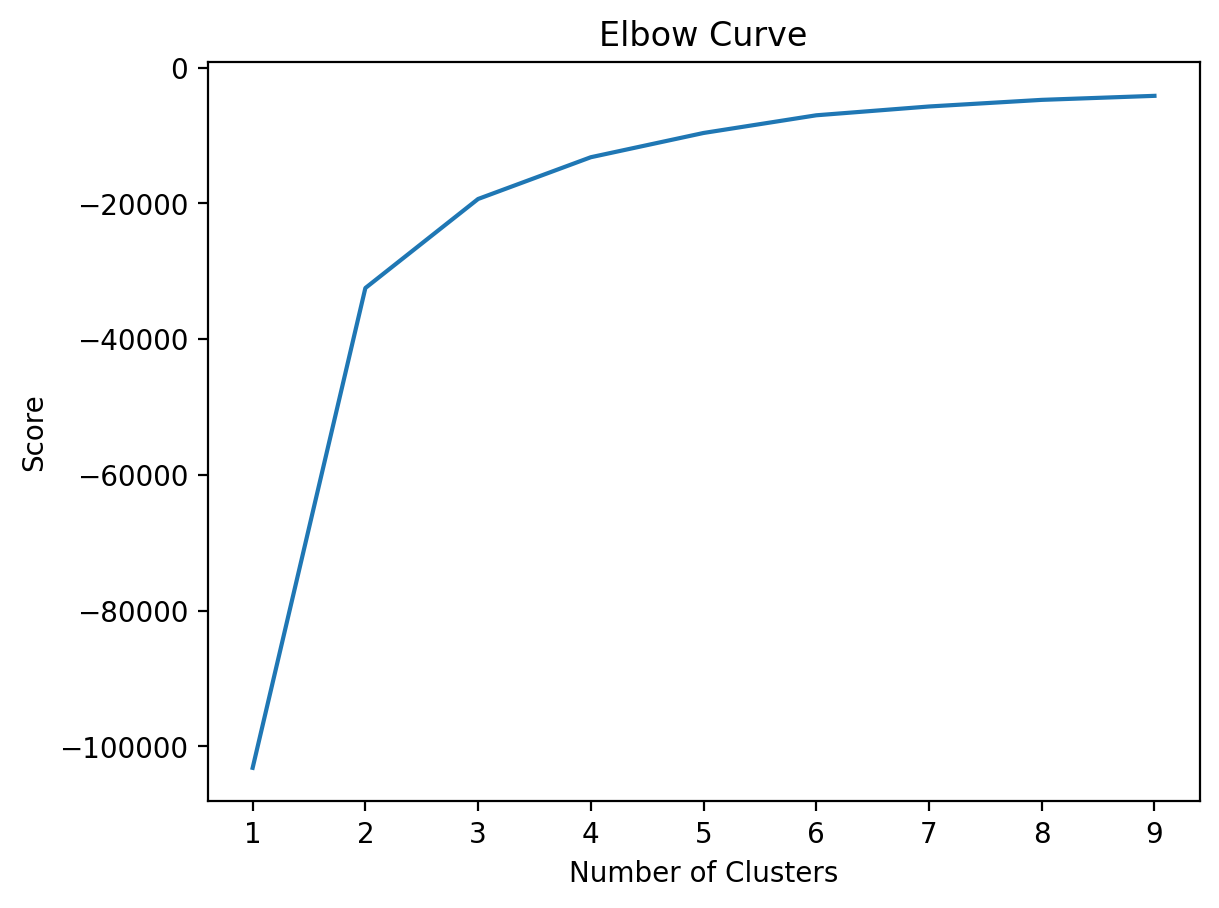

In [19]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

Optimal count of clusters bewteen 2 and 3 --> Elbow. Continueing with 2 clusters

# 04. K-means Clustering

In [20]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 2) 

In [21]:
# Fit the k-means object to the data.

kmeans.fit(d1_clus)

C:\Users\krist\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\krist\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


KMeans(n_clusters=2)

In [22]:
d1_clus['clusters'] = kmeans.fit_predict(d1_clus)

C:\Users\krist\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\krist\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\krist\AppData\Local\Temp\ipykernel_230384\2486448324.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1_clus['clusters'] = kmeans.fit_predict(d1_clus)


In [23]:
d1_clus.head()

,life Ladder,log GDP per capita,social support,healthy life expectancy at birth,freedom to make life choices,generosity,perceptions of corruption,positive affect,negative affect,clusters
0,3.724,7.350,0.451,50.5,0.718,0.168,0.882,0.414,0.258,1
1,4.402,7.509,0.552,50.8,0.679,0.191,0.850,0.481,0.237,1
2,4.758,7.614,0.539,51.1,0.600,0.121,0.707,0.517,0.275,1
3,3.832,7.581,0.521,51.4,0.496,0.164,0.731,0.480,0.267,1
4,3.783,7.661,0.521,51.7,0.531,0.238,0.776,0.614,0.268,1


In [24]:
d1_clus['clusters'].value_counts()

clusters
0    1329
1     629
Name: count, dtype: int64

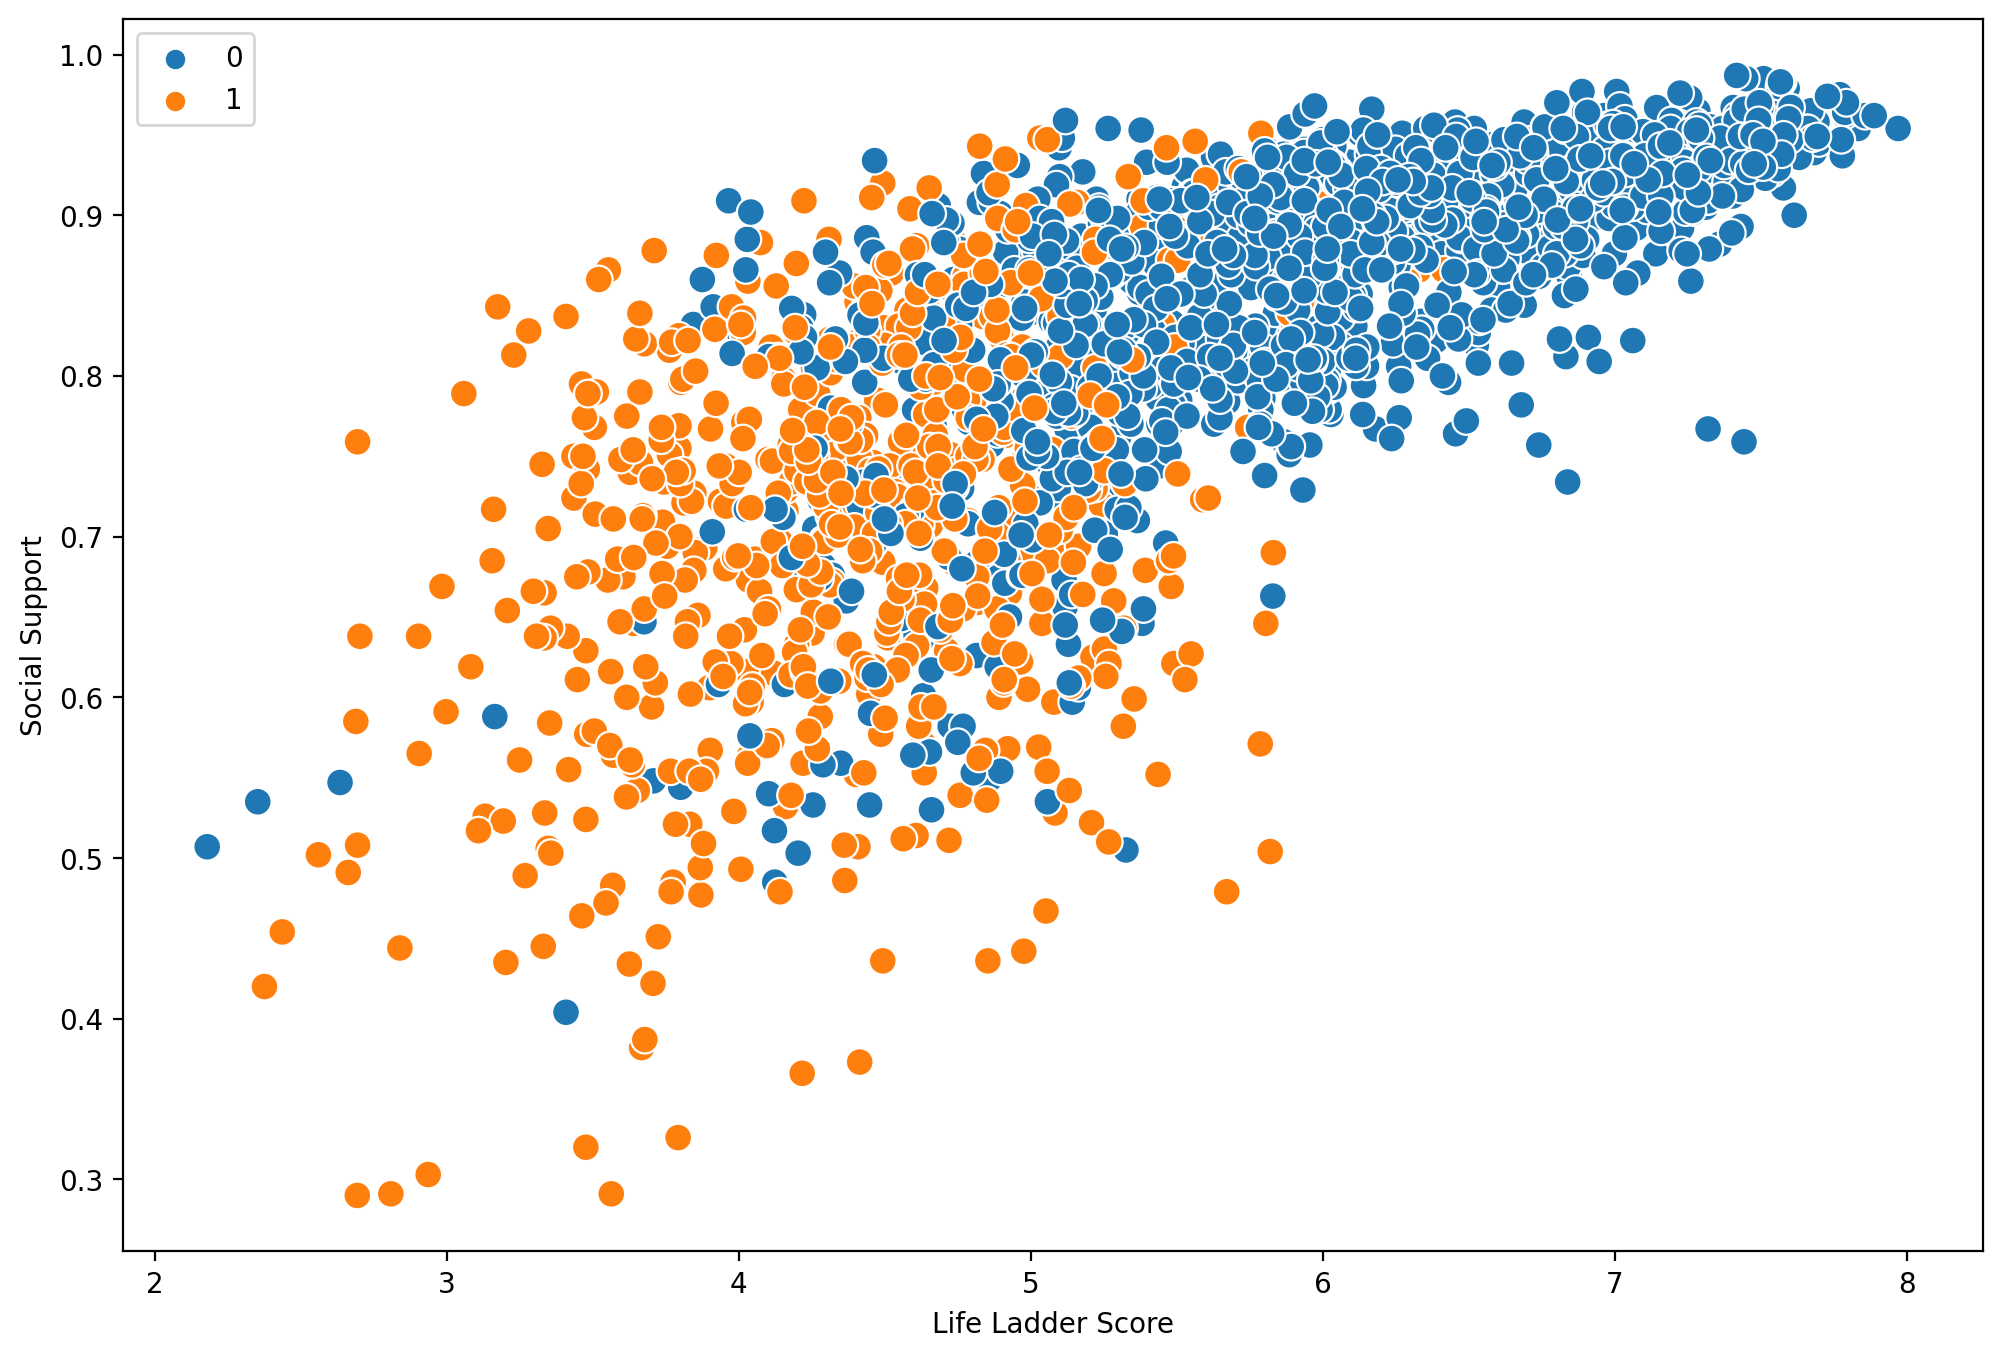

In [25]:
# Plot the clusters for the "social support" and "ladder score" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=d1_clus['life Ladder'], y=d1_clus['social support'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Life Ladder Score') # Label x-axis.
plt.ylabel('Social Support') # Label y-axis.
plt.show()

The majority of ladder scores above 5 (medium happiness on a 10 scale ladder) have an above average social support score which becomes visually striking in the top right corner.

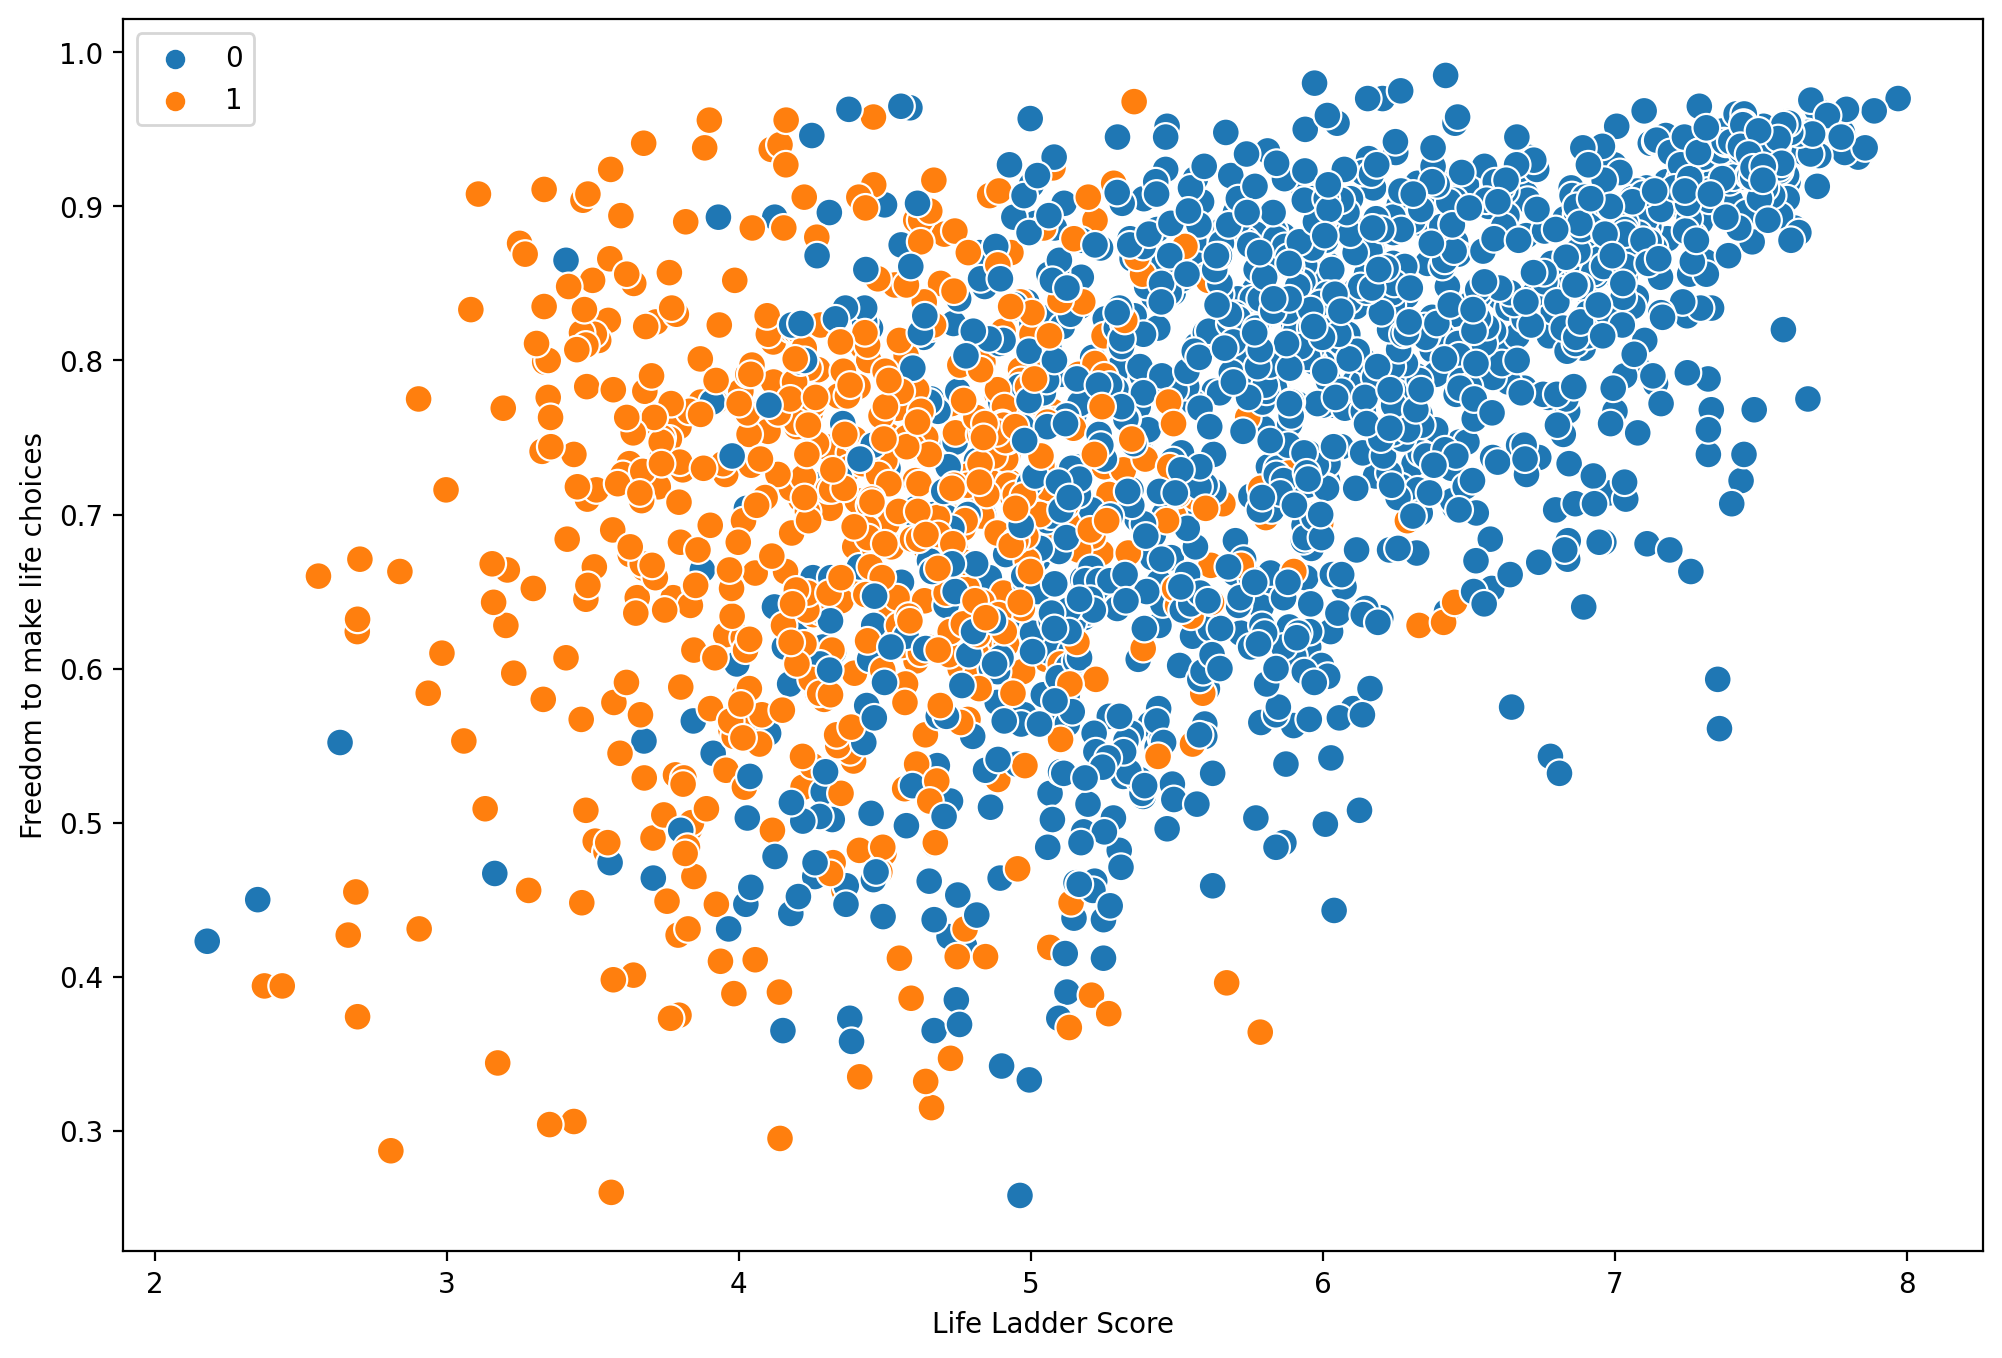

In [26]:
# Plot the clusters for the "freedom to make life choices" and "ladder score" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=d1_clus['life Ladder'], y=d1_clus['freedom to make life choices'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Life Ladder Score') 
plt.ylabel('Freedom to make life choices') 
plt.show()

Similar to the social support score, the majority of ladder scores above 5 (medium happiness on a 10 scale ladder) have an above average freedom to make life choices score. There are, however, more instances of high ladder ranking and low freedom to make life choices rankings. In the extremes it becomes more evident. There are no ladder scores above 6 with <0.6 freedom to make lifechoices scores and no ladder scores below 3 with freedom to make life choices scores above 0.7 

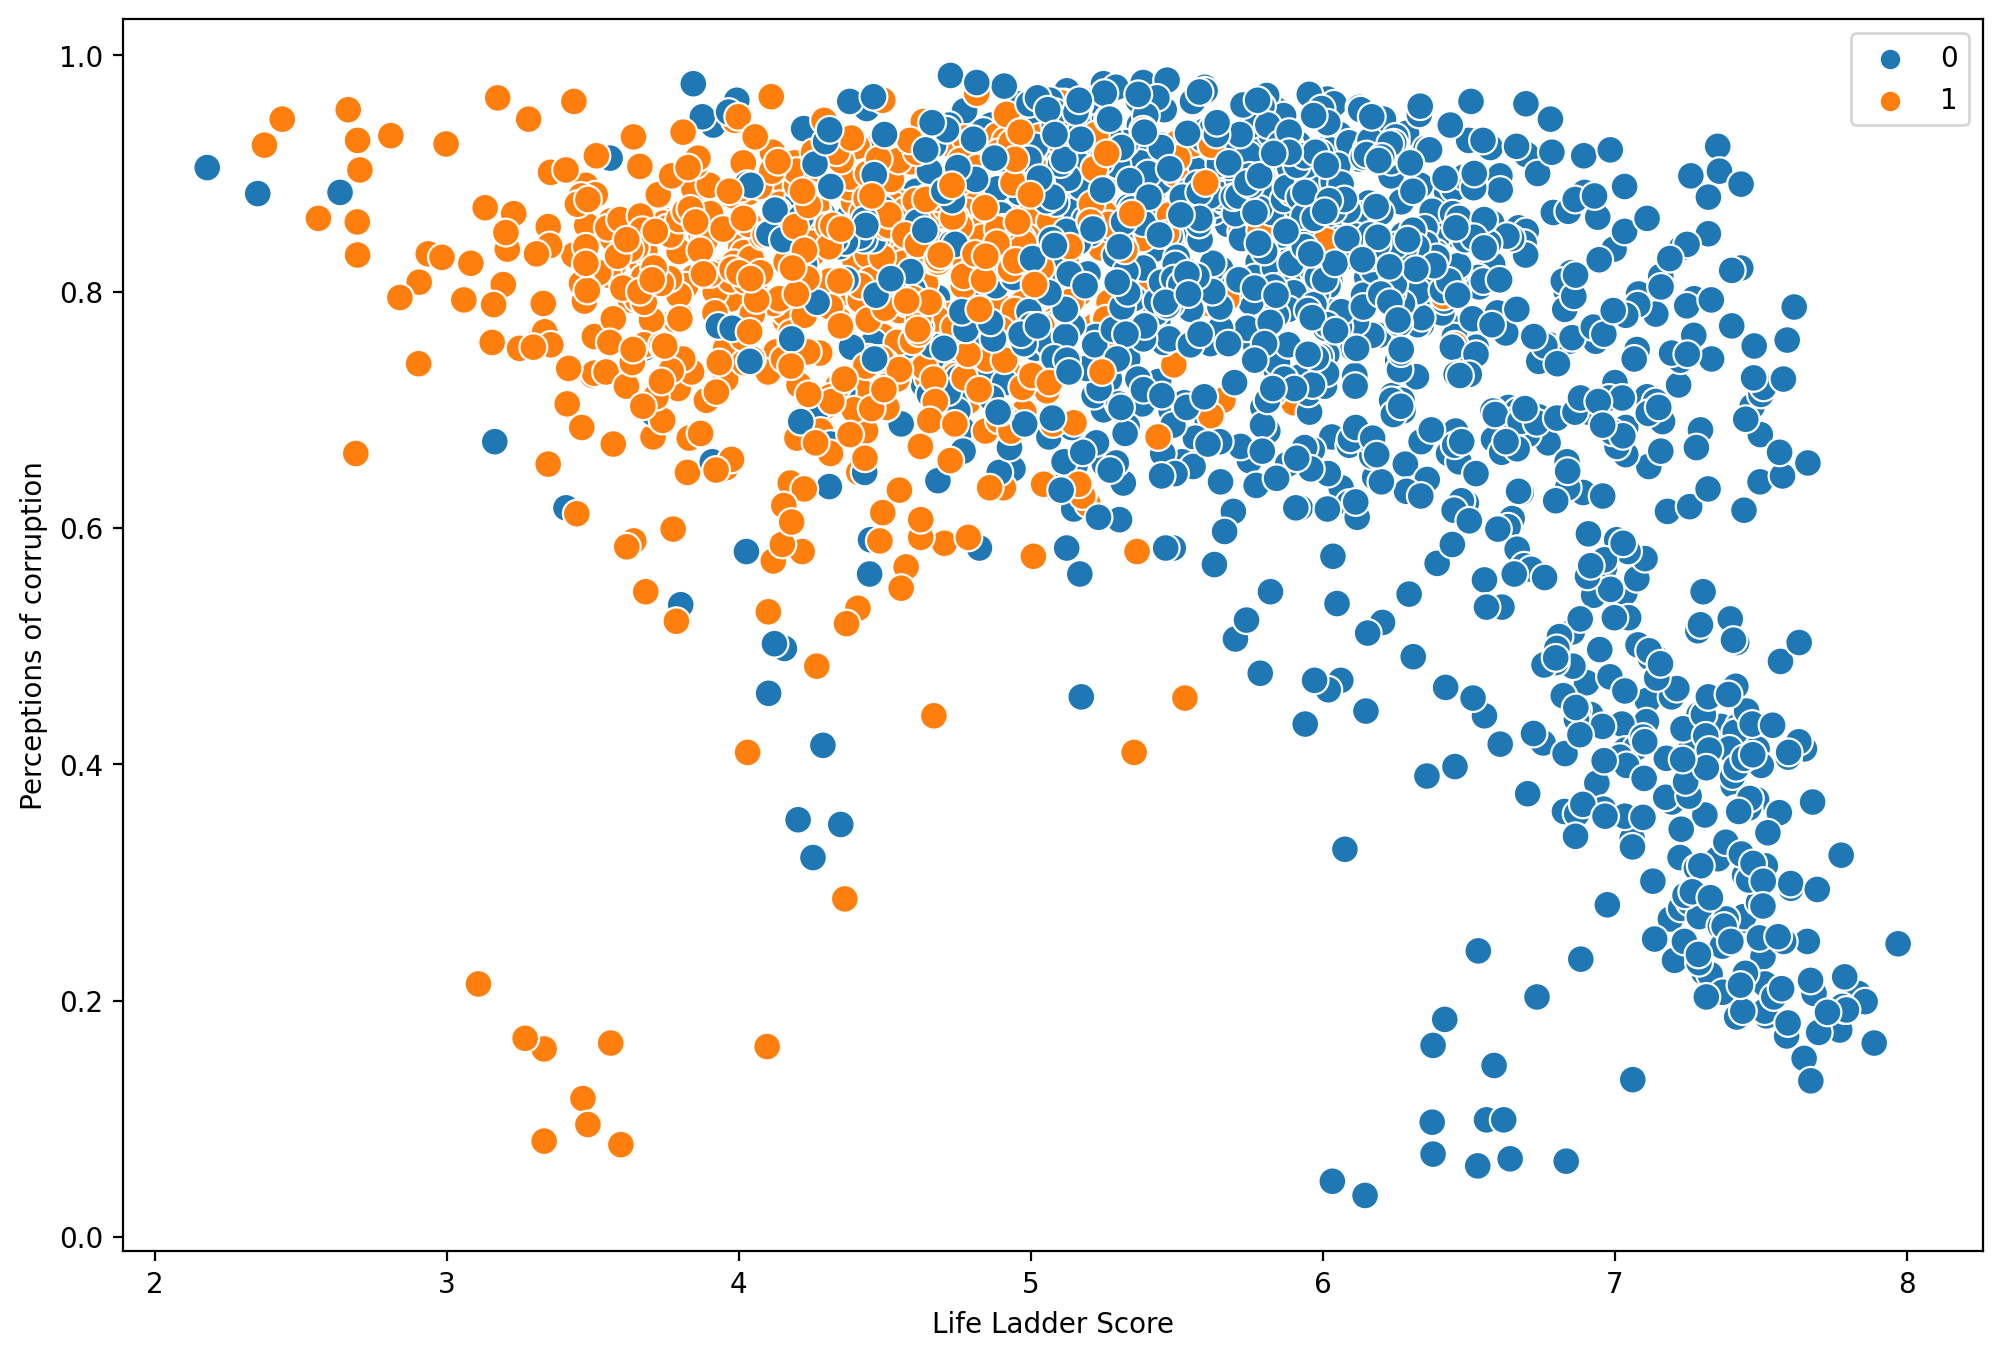

In [27]:
# Plot the clusters for the "perceptions of corruption" and "ladder score" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=d1_clus['life Ladder'], y=d1_clus['perceptions of corruption'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Life Ladder Score') 
plt.ylabel('Perceptions of corruption') 
plt.show()

Interestingly, most observations are on the higher end of the perceptions of corruption score and are fairly spread out on the life ladder range. There are a few observations of low perceptions of corruption that also have a low life ladder score, however, most observations on low poc have an >6 life ladder score. It seems more likely to see low poc with very high life ladder scores. Keeping in mind that in some countries like e.g. China the poll question was not posed makes me wonder in general how much censorship or fear of persecution might impact the 'perceptions of corruption' poll answers and whether this metric is really useful in explaining life evaluations.

In [32]:
d1_clus.loc[d1_clus['clusters'] == 1, 'cluster'] = 'orange'
d1_clus.loc[d1_clus['clusters'] == 0, 'cluster'] = 'blue'

C:\Users\krist\AppData\Local\Temp\ipykernel_230384\860889510.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1_clus.loc[d1_clus['clusters'] == 1, 'cluster'] = 'orange'


In [33]:
d1_clus.groupby('cluster').agg({'social support':['mean', 'median'], 
                         'freedom to make life choices':['mean', 'median'], 
                         'perceptions of corruption':['mean', 'median'],
                          'life Ladder':['mean', 'median']})

social support        freedom to make life choices         \
                  mean median                         mean median   
cluster                                                             
blue          0.856645  0.882                     0.772459  0.802   
orange        0.705590  0.720                     0.688391  0.709   

        perceptions of corruption        life Ladder         
                             mean median        mean median  
cluster                                                      
blue                     0.726508  0.789    5.966958  5.955  
orange                   0.793242  0.817    4.384696  4.417

The blue cluster has the highest stats in all categories except for the 'perceptions of corruption' category which supports the idea that better results in the 3 key factors do come with better results in life ladder scores. 

In [36]:
# Export d1_clus
d1_clus.to_csv(os.path.join(path, '02 Data','Prepared Data', 'd1_clusters.csv'))

# 05. Test on Prinicpal Component Analysis

### Step 1: Reduce Dimensionality

In [37]:
d1_pca = d1_clus.drop(columns = ['cluster','clusters'])

In [38]:
d1_pca.head()

,life Ladder,log GDP per capita,social support,healthy life expectancy at birth,freedom to make life choices,generosity,perceptions of corruption,positive affect,negative affect
0,3.724,7.350,0.451,50.5,0.718,0.168,0.882,0.414,0.258
1,4.402,7.509,0.552,50.8,0.679,0.191,0.850,0.481,0.237
2,4.758,7.614,0.539,51.1,0.600,0.121,0.707,0.517,0.275
3,3.832,7.581,0.521,51.4,0.496,0.164,0.731,0.480,0.267
4,3.783,7.661,0.521,51.7,0.531,0.238,0.776,0.614,0.268


In [39]:
# Standardise the data to have a mean of ~0 and a variance of 1
X_std = StandardScaler().fit_transform(d1_pca)

In [40]:
# Create a PCA instance: pca
pca = PCA(n_components=8)
principalComponents = pca.fit_transform(X_std)

([<matplotlib.axis.XTick at 0x23a7d4cdb50>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7')])

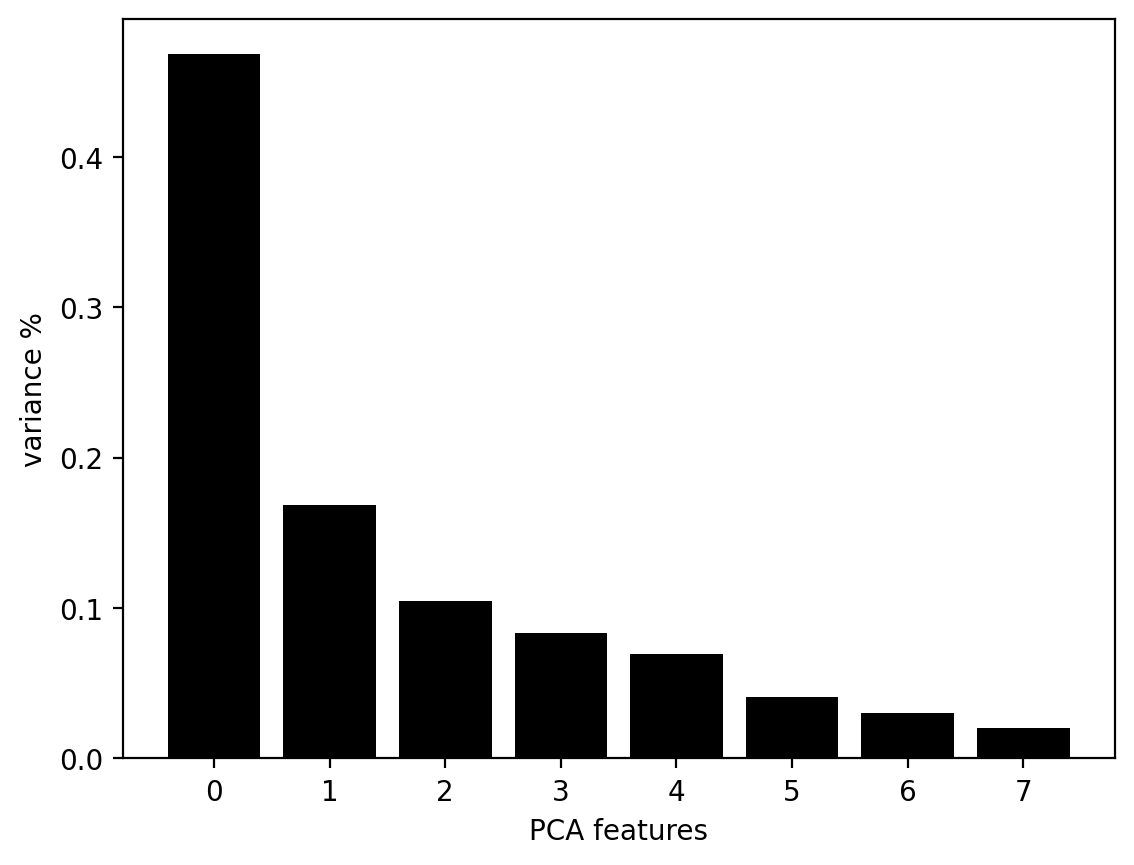

In [41]:
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

Variance drop-off after the 1st component (the ladder score). 

In [42]:
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

Text(0, 0.5, 'PCA 2')

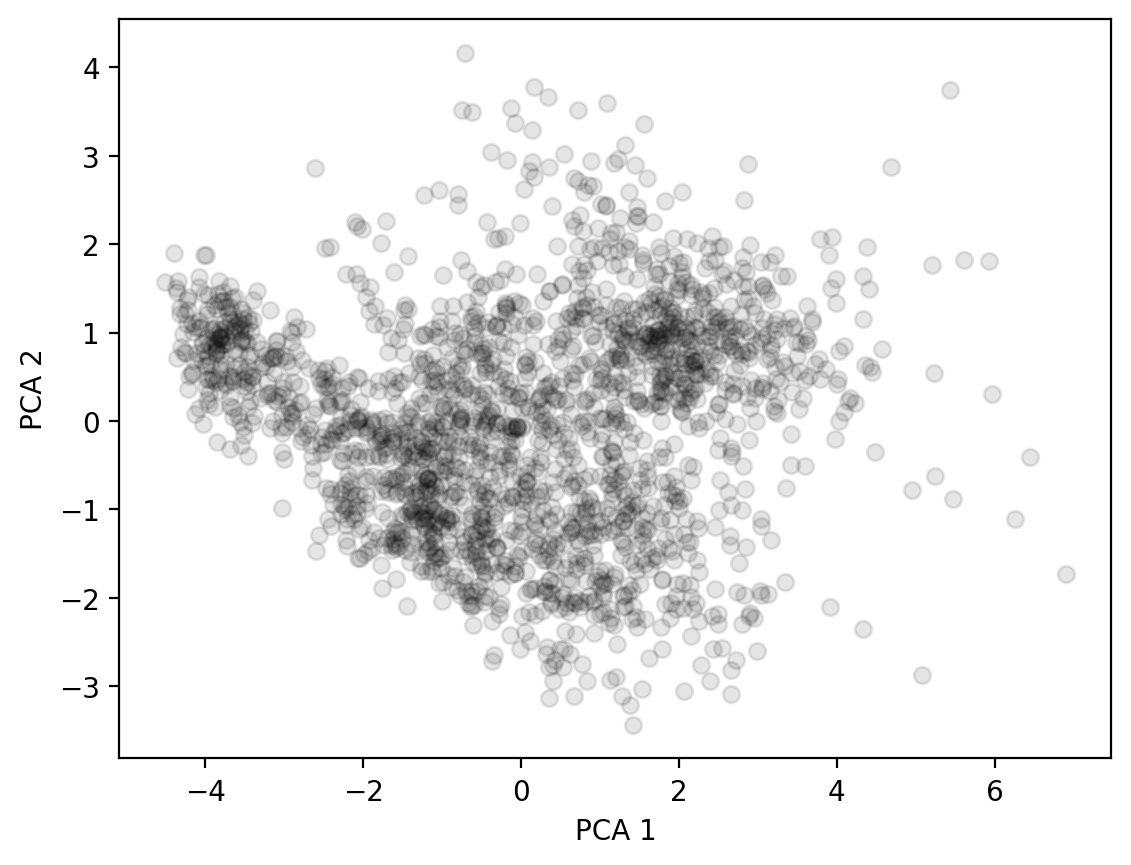

In [43]:
# Plot first two components
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')


Potentially 2 - 3 clusters visible. Not very prominent thought.

### Step 2: Find the Clusters

C:\Users\krist\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\krist\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\krist\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\krist\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

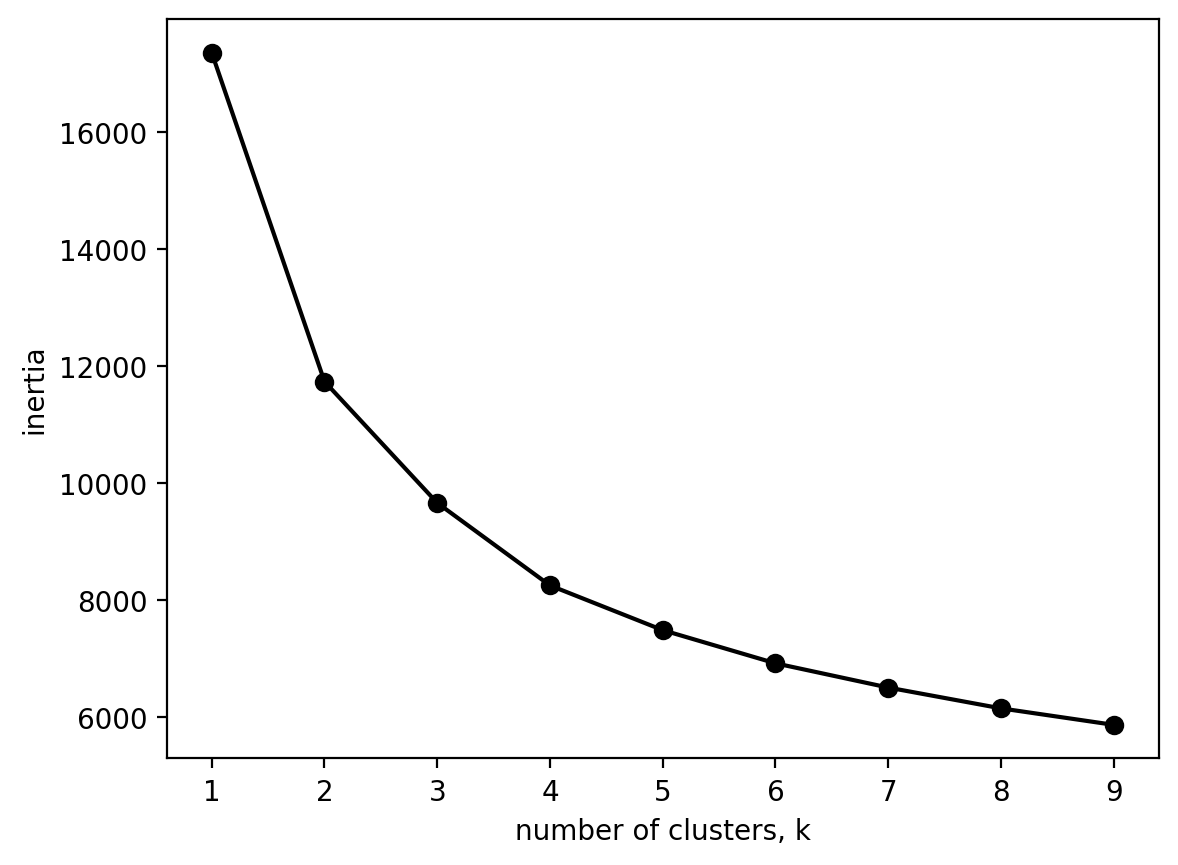

In [44]:
ks = range(1, 10)
inertias = [] 

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:8])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

Elbow point between 2 and 3. Continue with 3 clusters.

In [45]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [46]:
# Fit the k-means object to the data.

kmeans.fit(PCA_components)

C:\Users\krist\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\krist\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


KMeans(n_clusters=3)

In [47]:
PCA_components['color'] = kmeans.fit_predict(PCA_components)

C:\Users\krist\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\krist\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


In [48]:
PCA_components['color'].value_counts()

color
2    927
1    739
0    292
Name: count, dtype: int64

In [49]:
PCA_components.head()

,0,1,2,3,4,5,6,7,color
0,3.931662,1.503095,0.340467,1.132103,0.825078,1.486365,-0.774484,0.943627,1
1,3.058204,1.525335,-0.055724,0.853577,1.072086,0.829627,-0.448490,0.959338,1
2,2.942405,1.302786,0.301368,1.221567,0.659761,-0.184826,-0.400304,0.964594,1
3,3.689871,1.158654,0.251729,1.437273,1.305724,-0.272008,-0.546816,0.410143,1
4,3.220343,1.880914,0.142658,0.586009,1.170278,-0.597560,-0.927010,0.166339,1


In [50]:
PCA_components.groupby('color').agg({0:['mean', 'median'], 
                         2:['mean', 'median'], 
                         4:['mean', 'median'],
                         6:['mean', 'median']})

0                   2                   4                   6  \
           mean    median      mean    median      mean    median      mean   
color                                                                         
0     -3.317244 -3.492023  0.449964  0.524919  0.246653  0.214909  0.090821   
1      2.031504  1.890312  0.099488  0.161981 -0.002969 -0.076891  0.006523   
2     -0.574591 -0.576106 -0.221048 -0.232648 -0.075328 -0.120219 -0.033808   

                 
         median  
color            
0      0.112006  
1      0.003482  
2     -0.026162

0 - life ladder
2 - social support
4 - freedom to make life choices
6 - perceptions of corruption

Groups are hard to interpret

### Step 3: Visualise and Interpret the Clusters

Question: Can people be grouped based on their poll answers? It seems so yes - but the clusters are not always easy to interpret.

In [51]:
# Export PCA_components for visualisation in plotly chart studio
PCA_components.to_csv(os.path.join(path, '02 Data','Prepared Data', 'pca_components.csv'))

In [53]:
# 3D visualisation in plotly chart studio https://chart-studio.plotly.com/create/?fid=kluepken:1&fid=kluepken:2